In [12]:
import requests
from PIL import Image, ImageChops
from io import BytesIO

%matplotlib inline
import matplotlib.pyplot as plt

# 1. Intro - What are we looking at?
The white borders around the image could change the result when we are predicting if the image is silo or lifestyle. Silo and lifestyle are differentiated by background (white, or natuaral), so removing the white borders or augmenting other images with white borders is helpful achieving better result.

In [7]:
url= "https://i5.walmartimages.com/asr/c2a4c1ab-6417-407f-9713-440b9a5f78ef_1.76076d39c4ad5a0b78f0ce30964fc2e3.jpeg"

In [17]:
def read_url(url):
    response = requests.get(url, timeout=20)
    im = Image.open(BytesIO(response.content))
    return im

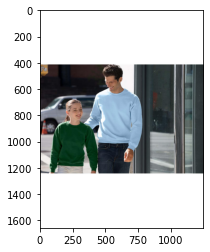

In [9]:
im = read_url(url)
plt.imshow(im)

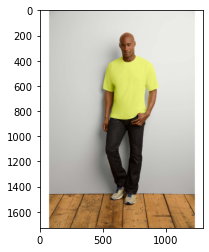

In [11]:
url2 = "https://i5.walmartimages.com/asr/40e19b90-3d16-46b2-ba24-e0ba116c0ab5_1.83e4f88685a42fa872db8da7fde2b004.jpeg"
im2 = read_url(url2)
plt.imshow(im2)

# 2. Removing white borders

In [20]:
im.getpixel((0,0))

(255, 255, 255)

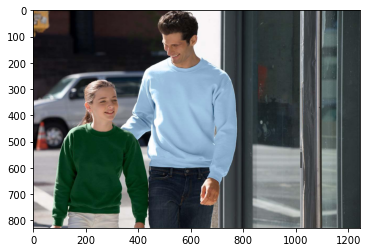

In [23]:
def trim(im):
    bg = Image.new(im.mode, im.size,(255, 255, 255)) # white image
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

new_im = trim(im)
plt.imshow(new_im)

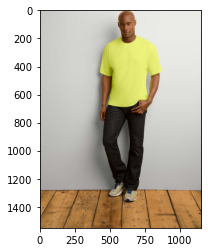

In [15]:
new_im2 = trim(im2)
plt.imshow(new_im2)

# 3. Verify it with silo image
Make sure it's not impacting silo images

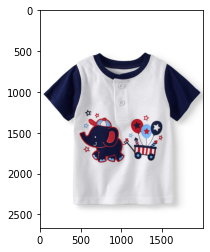

In [26]:
url3 = "https://i5.walmartimages.com/asr/b70aab54-7be5-470e-ba00-1f5400f628df_1.57dbc55e3cb2b2d1e568a4d89b8f35fb.jpeg"
im3 = read_url(url3)
plt.imshow(im3)

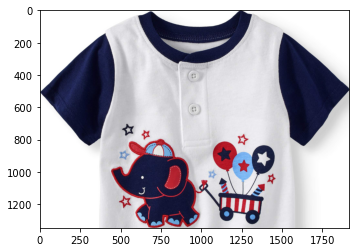

In [27]:
new_im3 = trim(im3)
plt.imshow(new_im3)

### Oh, no. The top is cropped. Then we cannot apply it to all images. Use augmentation instead